#ENGR 8140 - Advanced Deep Learning & Engineering Applications
## Assignment 1 - Gradient Descent Algorithms with PyTorch
The following code cell is used to generate some noisy data (don't change this code).  You will need to use the data generated here to train a linear model $y=ax+b$ (i.e., Perform gradient descent on the two parameters $a$ and $b$).


1.   You will need to code from scratch two algorithms (1) Gradient Descent + regular momentum, and (2) Adam. Use PyTorch "autograd" to compute gradients.
2.   Check your results against those from the linear regression model. You can do linear regression using "sklearn.linear_model" (Hint: you need to convert tensor to numpy array.)






### Explanation
At the beginning, we are generating a random, noisy linear equation. At first, a random value for x gets generated. Afterwards, the noise gets added and y gets calculated, dependent on the previously generated x value.

#### y = a * x + b

In [7]:
# No adjustions here
import torch
torch.manual_seed(42)
x = torch.rand(100,1)
y = 1 + 2 * x + .1 * torch.rand(100, 1)

In [8]:
# No adjustions here
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
a, b

(tensor([-0.6430], requires_grad=True), tensor([0.7113], requires_grad=True))

## Your code goes here:

Sklearn Linear Regression Coefficients
a: 2.0108862
b: 1.0401309

Gradient Descent with Momentum Coefficients
a: 2.0108799934387207
b: 1.040134310722351

Adam Optimizer Coefficients:
a: 2.1894969940185547
b: 0.9376135468482971


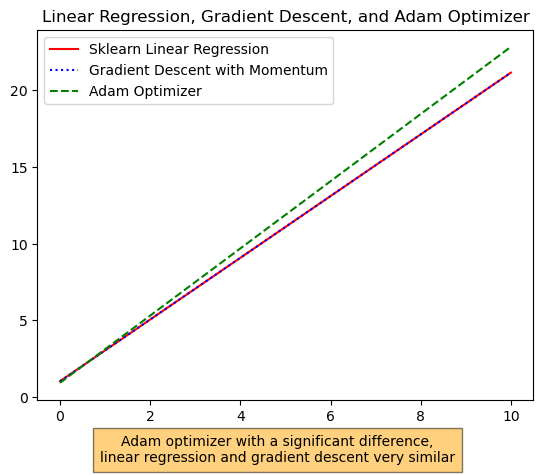

In [9]:
###### COPIED FROM ABOVE ######
# y = 1 + 2x + noise --> a = 2, b = 1 + noise

# Import necessary libraries
import torch

torch.manual_seed(42)
x = torch.rand(100,1)
y = 1 + 2 * x + .1 * torch.rand(100, 1) 

a_gradDesc = torch.randn(1, requires_grad=True)
b_gradDesc = torch.randn(1, requires_grad=True)

a_adam = torch.randn(1, requires_grad=True)
b_adam = torch.randn(1, requires_grad=True)

##########################################################################################

# Convert torch tensors to numpy arrays for sklearn linear regression
x_np = x.numpy() 
y_np = y.numpy()

#Linear regression using sklearn
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()
sklearn_model.fit(x_np, y_np)

##########################################################################################
#Part 1: Gradient Descent with regular momentum

#Hyperparameters
learning_rate = 0.01
momentum = 0.9
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
m_a, m_b = 0, 0
v_a, v_b = 0, 0
t = 0

for epoch in range(1000):
    #Forward pass
    y_pred = a_gradDesc * x + b_gradDesc
    loss = torch.mean((y_pred - y)**2)
    
    '''
    Why are we interested in finding the gradient in a linear function?
    '''
    #Backward pass
    loss.backward() # --> make some research on this function


    #Update parameters using momentum
    '''
    Do some research on the with torch.no_grad() function
    '''
    with torch.no_grad():
        m_a = momentum * m_a - learning_rate * a_gradDesc.grad
        m_b = momentum * m_b - learning_rate * b_gradDesc.grad
        a_gradDesc += m_a
        b_gradDesc += m_b

    #Zero gradients
    a_gradDesc.grad.zero_()
    b_gradDesc.grad.zero_()

##########################################################################################
#Part 2: Adam optimizer

#Hyperparameters
learning_rate = 0.01
momentum = 0.9
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
m_a, m_b = 0, 0
v_a, v_b = 0, 0
t = 0   

for epoch in range(1000):
    #Forward pass
    y_pred = a_adam * x + b_adam
    loss = torch.mean((y_pred - y)**2)

    #Backward pass
    loss.backward()

    #Update parameters using Adam optimizer
    with torch.no_grad():
        t += 1
        m_a = beta1 * m_a + (1 - beta1) * a_adam.grad
        m_b = beta1 * m_b + (1 - beta1) * b_adam.grad
        v_a = beta2 * v_a + (1 - beta2) * (a_adam.grad**2)
        v_b = beta2 * v_b + (1 - beta2) * (b_adam.grad**2)

        m_a_hat = m_a / (1 - beta1**t)
        m_b_hat = m_b / (1 - beta1**t)
        v_a_hat = v_a / (1 - beta2**t)
        v_b_hat = v_b / (1 - beta2**t)

        a_adam -= learning_rate * m_a_hat / (torch.sqrt(v_a_hat) + epsilon)
        b_adam -= learning_rate * m_b_hat / (torch.sqrt(v_b_hat) + epsilon)

    #Zero gradients
    '''
    Why do we have to zero down the gradients?
    '''
    a_adam.grad.zero_()
    b_adam.grad.zero_()

##########################################################################################
# Print the different results

# Check the results using sklearn linear regression
print("Sklearn Linear Regression Coefficients")
print("a:", sklearn_model.coef_[0][0])
print("b:", sklearn_model.intercept_[0])

# The gradient descent coefficients
print("\nGradient Descent with Momentum Coefficients")
print("a:", a_gradDesc.item())
print("b:", b_gradDesc.item())

# The Adam optimizer coefficients
print("\nAdam Optimizer Coefficients:")
print("a:", a_adam.item())
print("b:", b_adam.item())

##########################################################################################
# Plot the results

import matplotlib.pyplot as plt
import numpy as np

a_sklearn, b_sklearn = sklearn_model.coef_[0][0], sklearn_model.intercept_[0]
a_gdm, b_gdm = a_gradDesc.item(), b_gradDesc.item()
a_adam, b_adam = a_adam.item(), b_adam.item()

# Create x values
x = np.linspace(0, 10, 20)

# Calculate y values for each model
y_sklearn = a_sklearn * x + b_sklearn
y_gdm = a_gdm * x + b_gdm
y_adam = a_adam * x + b_adam

# Plot each line with a different color
plt.plot(x, y_sklearn, color='red', label='Sklearn Linear Regression')
plt.plot(x, y_gdm, color='blue', linestyle=':', label='Gradient Descent with Momentum')
plt.plot(x, y_adam, color='green', linestyle='--', label='Adam Optimizer')

# Add a legend
plt.legend()

# Title
plt.title('Linear Regression, Gradient Descent, and Adam Optimizer')

# Text below
plt.figtext(0.5, -0.02, "Adam optimizer with a significant difference,\nlinear regression and gradient descent very similar", ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

# Show the plot
plt.show()